# Ejercicio

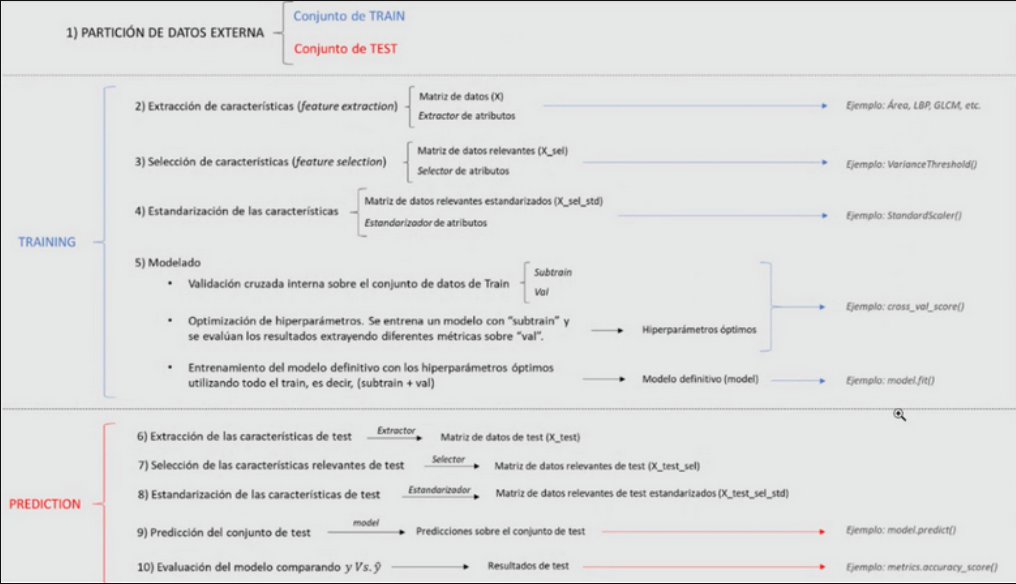

El siguiente ejercicio tiene como objetivo poder implementar los pasos necesarios de cara al proceso de entrenamiento del modelo predicto.

Como científico de datos, se le brinda un dataset sobre la performance de los estudiantes de un instituto en el area de matemáticas.
En el mismo cuenta con información relevante que le puede llevar a predecir el posible `grade` que un alumno/a puede obtener en base a las variables predictoras.

# Atributos para el dataset student-mat.csv (Math course)
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

### A continuación las evaluaciones para cada período. 
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

## Tareas a realizar

- Importar dataset
- Realizar limpieza y tranformaciones de datos necesarias
- Seleccionar el label (target variable) adecuada
- Realizar la partición de datos correspondiente
- Implementar los algoritomos de `f_test` y `mi` para la selección de atributos. Evaluar los resultados y seleccionar el mejor algoritmo. Definir los atributos predictores que serán utilizados para el entrenamiento del modelado (listarlos) 
- Implementar el algoritmo de normalización o estandarización requerido acorde al caso de uso


>Note: Tenga en cuenta que dependiendo el caso de uso se deberían realizar transformaciones sobre algunos datos categóricos y convertirlos en numéricos. Aquí no trabajaremos con ese proceso, por lo que tenga en cuenta solo las columnas númericas.

## Importar librerías

In [ ]:
import pandas as pd
import numpy as np
from numpy import quantile, where, random
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope 
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn import preprocessing

## Importar datos - limpieza - transformaciones - detección de outliers

In [ ]:
df = pd.read_csv('student-mat.csv',sep=';')
df.head()

In [7]:
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [39]:
df_2 = df[['age', 
           'Medu', 
           'Fedu', 
           'traveltime', 
           'studytime', 
           'failures',
           'famrel',
           'freetime',
           'goout',
           'Dalc',
           'Walc',
           'health',
           'absences',
           'G1',
           'G2',
           'G3']]

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   famrel      395 non-null    int64
 7   freetime    395 non-null    int64
 8   goout       395 non-null    int64
 9   Dalc        395 non-null    int64
 10  Walc        395 non-null    int64
 11  health      395 non-null    int64
 12  absences    395 non-null    int64
 13  G1          395 non-null    int64
 14  G2          395 non-null    int64
 15  G3          395 non-null    int64
dtypes: int64(16)
memory usage: 49.5 KB


In [40]:
# Outliers EllipticEnvelope
algorithm = EllipticEnvelope(support_fraction=None, 
                             contamination=0.25, 
                             random_state=42) 

outlier_method = algorithm.fit(df_2)
# Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
df_outliers = outlier_method.predict(df_2)
print(df_outliers)

# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0] #En este arreglo, donde tengo -1, esos son los outliers.
"""
In simple terms, np.where(array==x)[0] returns a list of indices where the conditions have been met. I'm guessing this is a result of designing numpy for extensively broad applications.
"""

print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))

[ 1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1 -1
 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1
 -1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
 -1  1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1
 -1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1
  1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1

In [41]:
df_wo_outliers = df_2[df_outliers==1]
df_wo_outliers.shape

(296, 16)

## 1. Partición de datos

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_wo_outliers.drop(labels='G3', axis=1), 
                                                    df_wo_outliers['G3'], 
                                                    test_size=0.2, 
                                                    random_state=42)

In [43]:
print("Display Train/Test data")
print("-----------------------------")
display (X_train.head())
print("-----------------------------")
display (X_test.head())
print("-----------------------------")
display (y_train.head())
print("-----------------------------")
display (y_test.head())

Display Train/Test data
-----------------------------


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
72,15,1,1,1,2,2,3,3,4,2,4,5,2,8,6
19,16,4,3,1,1,0,3,1,3,1,3,5,4,8,10
286,18,2,2,1,3,0,4,3,3,1,2,2,5,18,18
290,18,4,2,1,2,0,4,3,2,1,4,5,11,12,11
243,16,4,4,1,1,0,5,3,2,1,2,5,0,13,12


-----------------------------


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
361,18,1,1,2,2,1,4,4,3,2,3,5,2,13,12
207,16,4,3,1,2,0,1,3,2,1,1,1,10,11,12
97,16,2,1,1,2,0,4,3,5,1,1,5,2,8,9
95,15,1,1,2,4,1,3,1,2,1,1,1,2,7,10
345,18,3,2,1,3,0,5,4,3,2,3,1,7,13,13


-----------------------------


72      5
19     10
286    19
290    11
243    12
Name: G3, dtype: int64

-----------------------------


361    12
207    13
97     10
95     10
345    14
Name: G3, dtype: int64

## 2. Selección de atributos

In [44]:
# Implementar f_test
f_test, _ = f_regression(X_train, y_train) # Llamamos al estadístico F
print(f_test)
print(f_test.shape)

[4.62279639e+00 6.93697733e+00 4.69556578e+00 5.45430396e-01
 3.65636527e-01 5.92310423e+00 2.42474488e+00 7.56381219e-01
 5.42909752e+00 2.05742720e+00 3.48218416e+00 3.10053490e-01
 1.44234101e+01 8.21796468e+02 3.41134255e+03]
(15,)


In [48]:
f_test = pd.Series(f_test)
f_test.index = X_train.columns
f_test.sort_values(ascending=False)

G2            3411.342552
G1             821.796468
absences        14.423410
Medu             6.936977
failures         5.923104
goout            5.429098
Fedu             4.695566
age              4.622796
Walc             3.482184
famrel           2.424745
Dalc             2.057427
freetime         0.756381
traveltime       0.545430
studytime        0.365637
health           0.310053
dtype: float64

<Axes: >

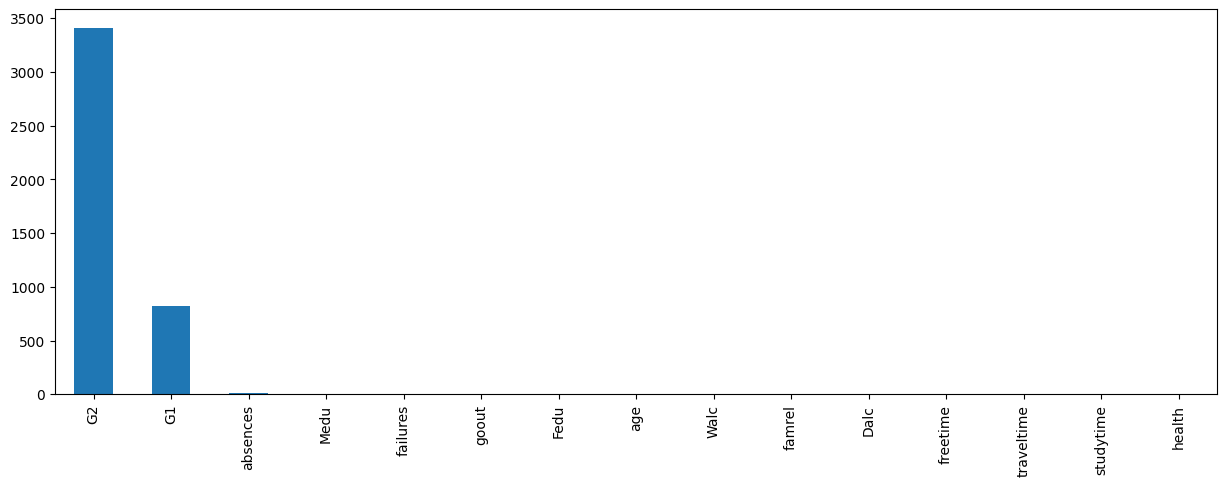

In [49]:
f_test.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [50]:
# Implementar mi
mutual_info = mutual_info_regression(X_train, y_train)
print(mutual_info)
print(mutual_info.shape)

[0.04471073 0.00354286 0.         0.         0.         0.05978552
 0.         0.         0.         0.         0.         0.
 0.0100343  0.65158458 0.9381882 ]
(15,)


In [51]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

G2            0.938188
G1            0.651585
failures      0.059786
age           0.044711
absences      0.010034
Medu          0.003543
Fedu          0.000000
traveltime    0.000000
studytime     0.000000
famrel        0.000000
freetime      0.000000
goout         0.000000
Dalc          0.000000
Walc          0.000000
health        0.000000
dtype: float64

<Axes: >

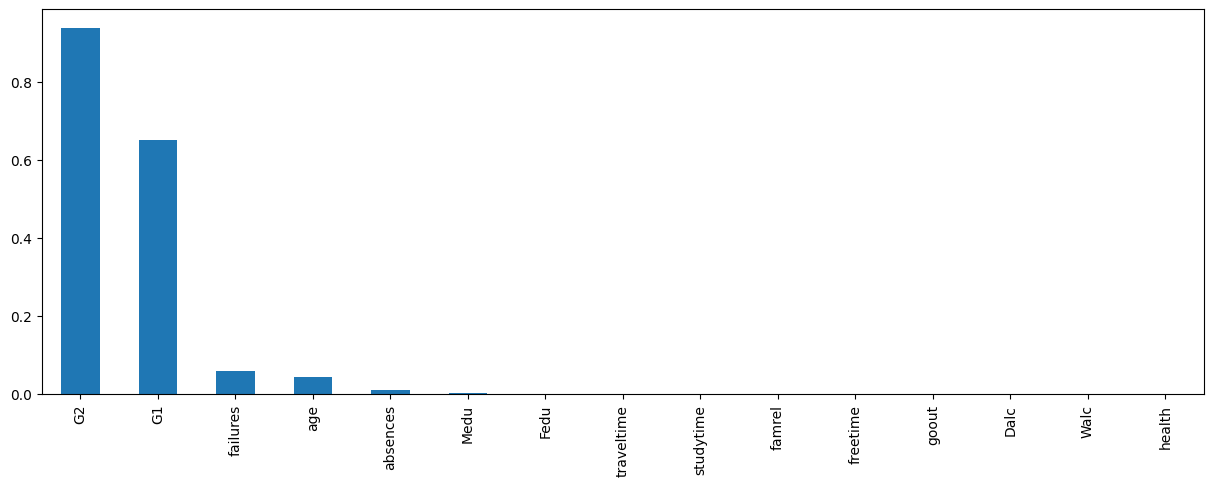

In [52]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

## 3. Normalización / Estandarización

In [ ]:
# Implementar el mecanismo de preprocesado acorde al dataset